In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import numpy as np
from sklearn.linear_model import LinearRegression
import pingouin as pg

In [22]:
env = pd.read_csv('2020-03-03_env.csv')
pct = pd.read_csv('2020-03-03_individual_temps_env_logger.csv')
plant_detection = pd.read_csv('plant_detections.csv')

In [23]:
env['time'] = pd.to_datetime(env['time'])

In [24]:
del env['Unnamed: 0']

In [25]:
## Gets values from the top of the hour from env file
env['minute'] = env.time.dt.minute
hour_only = env.loc[env['minute'] == 0]

In [6]:
## Finding out OLS (Ordinary Least Squares) Regression Results to get r-squared, m and b values
pct_model = ols('median_c ~ atm_temp', data = plant_detection).fit()

In [7]:
print(pct_model.summary())

                            OLS Regression Results                            
Dep. Variable:               median_c   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                 8.534e+04
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:11:46   Log-Likelihood:                -31216.
No. Observations:               18269   AIC:                         6.244e+04
Df Residuals:                   18267   BIC:                         6.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9529      0.062     47.491      0.0

Text(0.5, 1.0, 'PCT vs Atm Temp')

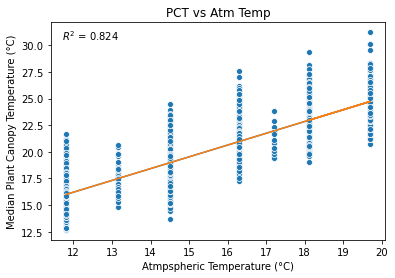

In [14]:
## Plotting figure with regression line using results found in OLS regression results
x = plant_detection['atm_temp']
y = plant_detection['median_c']
#m, b = np.polyfit(x, y, 1)
m = 1.1050
b = 2.9529
plt.plot(x, m*x + b)
sns.scatterplot(x, y)
plt.plot(x, m*x + b)
r2 = 0.824
plt.text(11.7, 30.5, '$R^{2}$ = %0.3f' % r2)
plt.xlabel('Atmpspheric Temperature (°C)')
plt.ylabel('Median Plant Canopy Temperature (°C)')
plt.title('PCT vs Atm Temp')
#plt.savefig('PCT vs Atm T Regression.png', dpi = 300)

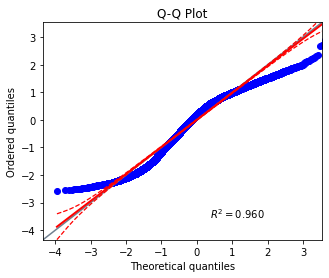

In [81]:
## Plotting qqplot to see if data is normal
x = plant_detection['atm_temp']
y = plant_detection['median_c']
ax = pg.qqplot(y, dist='norm')
plt.savefig('pg qqplot.png', dpi = 300)

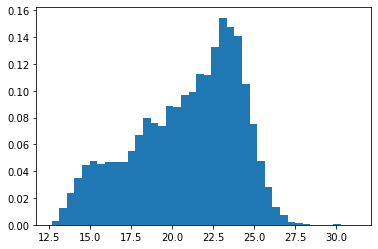

In [88]:
## histogram of data to see if it is normally distributed
x = plant_detection['atm_temp']
y = plant_detection['median_c']
plt.hist(y, density=True, bins = 40);

In [89]:
pg.ancova(data=plant_detection, dv='median_c', covar=['atm_temp'], between='treatment')

,Source,SS,DF,F,p-unc,np2
0,treatment,2476.926785,3,500.396209,1.582923e-312,0.075951
1,atm_temp,24988.844325,1,15144.964760,0.000000e+00,0.453320
2,Residual,30135.180899,18264,NaN,NaN,NaN


In [101]:
pg.ancova(data=plant_detection, dv='median_c', covar=['atm_temp', 'azmet_wind_velocity'], between='treatment')

,Source,SS,DF,F,p-unc,np2
0,treatment,2312.531343,3,478.974469,1.280591e-299,0.072941
1,atm_temp,25326.143282,1,15736.750211,0.000000e+00,0.462849
2,azmet_wind_velocity,743.384718,1,461.912400,3.300609e-101,0.024668
3,Residual,29391.796181,18263,NaN,NaN,NaN


In [151]:
pg.ancova(data=plant_detection, dv='median_c', covar=['atm_temp', 'azmet_wind_velocity', 'azmet_relative_humidity'], 
          between='treatment')

,Source,SS,DF,F,p-unc,np2
0,treatment,2245.484080,3,471.000825,8.375919e-295,0.071817
1,atm_temp,39.863195,1,25.084477,5.538452e-07,0.001372
2,azmet_wind_velocity,617.288561,1,388.437518,1.403234e-85,0.020827
3,azmet_relative_humidity,370.594143,1,233.201583,2.514776e-52,0.012609
4,Residual,29021.202037,18262,NaN,NaN,NaN


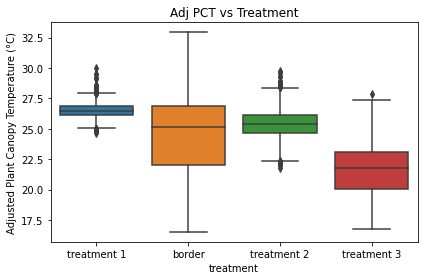

In [164]:
sns.boxplot(x='treatment', y='median_adj', data=plant_detection)
plt.ylabel('Adjusted Plant Canopy Temperature (°C)')
plt.title('Adj PCT vs Treatment')
plt.tight_layout()
#plt.savefig('PCT vs Treatment.png', dpi = 300)

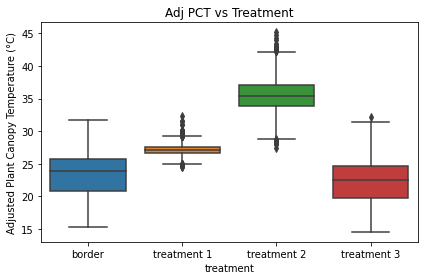

In [26]:
sns.boxplot(x='treatment', y='median_adj2', data=plant_detection)
plt.ylabel('Adjusted Plant Canopy Temperature (°C)')
plt.title('Adj PCT vs Treatment')
plt.tight_layout()
#plt.savefig('PCT vs Treatment.png', dpi = 300)